# Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data  = pd.read_csv('../data/Census_UHI_US_Urbanized_vegetation_albedo_CUHI_SUHI.csv')
rural = pd.read_csv('../data/UHI_US_Urbanized_vegetation_albedo_CUHI_SUHI_diss_rur.csv')
meta  = pd.read_csv('../data/Census_UHI_US_Urbanized_climzone_metadata.csv')

In [3]:
len(data), len(rural), len(meta)

(55871, 497, 493)

In [4]:
data.columns

Index(['system:index', 'AT_rur_day_summer', 'AT_rur_night_summer',
       'AT_urb_day_CT_act_summer', 'AT_urb_day_all_summer',
       'AT_urb_night_CT_act_summer', 'AT_urb_night_all_summer', 'Albedo',
       'Albedo_Built', 'Albedo_Built_all', 'Albedo_Grass', 'Albedo_Grass_all',
       'Albedo_Tree', 'Albedo_Tree_all', 'Albedo_all', 'Area', 'Census_geoid',
       'DEM_rur', 'DEM_urb_CT', 'DEM_urb_CT_act', 'DEM_urb_all', 'ESABuilt',
       'ESABuilt_all', 'ESAGrass', 'ESAGrass_all', 'ESATree', 'ESATree_all',
       'LST_rur_day_summer', 'LST_rur_night_summer',
       'LST_urb_day_CT_act_summer', 'LST_urb_day_all_summer',
       'LST_urb_night_CT_act_summer', 'LST_urb_night_all_summer',
       'Urban_geoid', 'Urban_name', 'Urban_name_extended', '.geo'],
      dtype='object')

In [5]:
rural.columns

Index(['system:index', 'Albedo_Built_rur', 'Albedo_Grass_rur',
       'Albedo_Tree_rur', 'Albedo_rur', 'Area_rur', 'Coastal?', 'ESABuilt_rur',
       'ESAGrass_rur', 'ESATree_rur', 'Urban_name', '.geo'],
      dtype='object')

In [6]:
data = data.merge(meta[['Clim_zone', 'Coastal?', 'Urban_name']], how='left', on='Urban_name')
data = data.merge(rural.drop(columns=['system:index', '.geo', 'Coastal?']), how='left', on='Urban_name')

In [7]:
len(data)

55871

In [8]:
data.rename(columns={'Clim_zone': 'Climate Zone'}, inplace=True)

In [9]:
data.head()

,system:index,AT_rur_day_summer,AT_rur_night_summer,AT_urb_day_CT_act_summer,AT_urb_day_all_summer,AT_urb_night_CT_act_summer,AT_urb_night_all_summer,Albedo,Albedo_Built,Albedo_Built_all,Albedo_Grass,Albedo_Grass_all,Albedo_Tree,Albedo_Tree_all,Albedo_all,Area,Census_geoid,DEM_rur,DEM_urb_CT,DEM_urb_CT_act,DEM_urb_all,ESABuilt,ESABuilt_all,ESAGrass,ESAGrass_all,ESATree,ESATree_all,LST_rur_day_summer,LST_rur_night_summer,LST_urb_day_CT_act_summer,LST_urb_day_all_summer,LST_urb_night_CT_act_summer,LST_urb_night_all_summer,Urban_geoid,Urban_name,Urban_name_extended,.geo,Climate Zone,Coastal?,Albedo_Built_rur,Albedo_Grass_rur,Albedo_Tree_rur,Albedo_rur,Area_rur,ESABuilt_rur,ESAGrass_rur,ESATree_rur
0,00000000000000000132,34.924404,21.757747,35.112454,35.016955,21.933739,21.85244,0.214670,0.222724,0.227048,0.215284,0.204732,0.180942,0.173744,0.212203,3.612190e+06,48441011400,535.962751,531.262001,531.262001,533.762669,1.923120e+06,4.970526e+07,3.074373e+05,4.279068e+07,7.771083e+05,2.264740e+07,41.7423,22.614651,43.351823,42.363243,23.277403,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06
1,00000000000000000133,34.924404,21.757747,34.978955,35.016955,21.911980,21.85244,0.221502,0.248659,0.227048,0.208602,0.204732,0.164859,0.173744,0.212203,7.995815e+06,48441012200,535.962751,529.449501,532.223446,533.762669,1.598146e+06,4.970526e+07,3.646100e+06,4.279068e+07,1.322474e+06,2.264740e+07,41.7423,22.614651,41.693683,42.363243,22.925598,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06
2,00000000000000000134,34.924404,21.757747,34.925510,35.016955,21.900347,21.85244,0.217811,0.247611,0.227048,0.222031,0.204732,0.154968,0.173744,0.212203,1.301622e+06,48441012100,535.962751,531.698485,531.698485,533.762669,3.897641e+05,4.970526e+07,5.920586e+05,4.279068e+07,2.398845e+05,2.264740e+07,41.7423,22.614651,40.512643,42.363243,22.430844,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06
3,00000000000000000135,34.924404,21.757747,35.190528,35.016955,22.110893,21.85244,0.235294,0.243688,0.227048,0.217764,0.204732,0.189559,0.173744,0.212203,1.827807e+06,48441011900,535.962751,529.895505,529.895505,533.762669,9.567481e+05,4.970526e+07,1.491961e+05,4.279068e+07,3.368867e+05,2.264740e+07,41.7423,22.614651,43.857052,42.363243,23.956061,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06
4,00000000000000000323,34.924404,21.757747,35.108325,35.016955,22.096334,21.85244,0.215404,0.220232,0.227048,0.217527,0.204732,0.188800,0.173744,0.212203,2.746964e+06,48441012300,535.962751,538.201497,538.201497,533.762669,1.386262e+06,4.970526e+07,4.748822e+05,4.279068e+07,4.949957e+05,2.264740e+07,41.7423,22.614651,43.410609,42.363243,23.800659,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06


## Calculate Urban Anomalies
We compute the urban-rural anomalies for each continuous variable. We can calculate the tree fraction, grass fraction, and built fraction by dividing the given variable by the area of the census tract. 

In [10]:
data['CUHI Day'] = data['AT_urb_day_CT_act_summer'] - data['AT_rur_day_summer']
data['CUHI Night'] = data['AT_urb_night_CT_act_summer'] - data['AT_rur_night_summer']
data['SUHI Day'] = data['LST_urb_day_CT_act_summer'] - data['LST_rur_day_summer']
data['SUHI Night'] = data['LST_urb_night_CT_act_summer'] - data['LST_rur_night_summer']

In [11]:
data['ESABuiltFraction'] = data['ESABuilt'] / data['Area']
data['ESAGrassFraction'] = data['ESAGrass'] / data['Area']
data['ESATreeFraction']  = data['ESATree'] / data['Area']

data['ESABuiltFractionRural'] = data['ESABuilt_rur'] / data['Area_rur']
data['ESAGrassFractionRural'] = data['ESAGrass_rur'] / data['Area_rur']
data['ESATreeFractionRural']  = data['ESATree_rur'] / data['Area_rur']

data.loc[data['ESABuiltFraction'] > 1, 'ESABuiltFraction'] = 1

In [12]:
data[['ESABuiltFraction', 'ESAGrassFraction', 'ESATreeFraction', 
      'ESABuiltFractionRural', 'ESAGrassFractionRural', 'ESATreeFractionRural']].describe()

,ESABuiltFraction,ESAGrassFraction,ESATreeFraction,ESABuiltFractionRural,ESAGrassFractionRural,ESATreeFractionRural
count,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000,55871.000000
mean,0.359037,0.138873,0.380735,0.097264,0.239385,0.523429
std,0.278373,0.120444,0.253447,0.058871,0.106217,0.235143
min,0.000000,0.000000,0.000000,0.020873,0.013830,0.003198
25%,0.121453,0.046529,0.151364,0.058193,0.153120,0.348904
50%,0.293530,0.111983,0.368969,0.083564,0.242097,0.561049
75%,0.555940,0.200768,0.586754,0.118181,0.307092,0.732566
max,1.000000,0.962560,0.988708,0.418078,0.701311,0.924465


In [13]:
data['Built Fraction'] = data['ESABuiltFraction'] - data['ESABuiltFractionRural']
data['Grass Fraction'] = data['ESAGrassFraction'] - data['ESAGrassFractionRural']
data['Tree Fraction']  = data['ESATreeFraction']  - data['ESATreeFractionRural']


In [14]:
data[['Built Fraction', 'Grass Fraction', 'Tree Fraction']].describe()

,Built Fraction,Grass Fraction,Tree Fraction
count,55871.000000,55871.000000,55871.000000
mean,0.261773,-0.100512,-0.142694
std,0.271293,0.124581,0.232172
min,-0.387169,-0.685947,-0.895735
25%,0.040574,-0.178176,-0.267570
50%,0.195790,-0.092823,-0.102322
75%,0.438242,-0.023983,0.011075
max,0.960109,0.620933,0.769486


In [15]:
data['Albedo']       = data['Albedo'] - data['Albedo_rur']
data['Built Albedo'] = data['Albedo_Built'] - data['Albedo_Built_rur']
data['Grass Albedo'] = data['Albedo_Grass'] - data['Albedo_Grass_rur']
data['Tree Albedo']  = data['Albedo_Tree'] - data['Albedo_Tree_rur']
data['Elevation']    = data['DEM_urb_CT_act'] - data['DEM_rur']

In [16]:
data[['Albedo', 'Built Albedo', 'Grass Albedo', 'Tree Albedo', 'Elevation']].describe()

,Albedo,Built Albedo,Grass Albedo,Tree Albedo,Elevation
count,55142.000000,55088.000000,54187.000000,55029.000000,55871.000000
mean,0.000496,-0.003816,0.000594,0.001508,-25.049688
std,0.024211,0.022432,0.016245,0.014200,77.738846
min,-0.172334,-0.101179,-0.178438,-0.109240,-317.562325
25%,-0.010496,-0.016441,-0.008023,-0.007042,-50.580741
50%,-0.000856,-0.005955,-0.001136,-0.000522,-12.163719
75%,0.010770,0.005808,0.006955,0.008102,4.055204
max,1.103716,1.066417,0.304830,0.379274,1637.848636


In [17]:
data.head()

,system:index,AT_rur_day_summer,AT_rur_night_summer,AT_urb_day_CT_act_summer,AT_urb_day_all_summer,AT_urb_night_CT_act_summer,AT_urb_night_all_summer,Albedo,Albedo_Built,Albedo_Built_all,Albedo_Grass,Albedo_Grass_all,Albedo_Tree,Albedo_Tree_all,Albedo_all,Area,Census_geoid,DEM_rur,DEM_urb_CT,DEM_urb_CT_act,DEM_urb_all,ESABuilt,ESABuilt_all,ESAGrass,ESAGrass_all,ESATree,ESATree_all,LST_rur_day_summer,LST_rur_night_summer,LST_urb_day_CT_act_summer,LST_urb_day_all_summer,LST_urb_night_CT_act_summer,LST_urb_night_all_summer,Urban_geoid,Urban_name,Urban_name_extended,.geo,Climate Zone,Coastal?,Albedo_Built_rur,Albedo_Grass_rur,Albedo_Tree_rur,Albedo_rur,Area_rur,ESABuilt_rur,ESAGrass_rur,ESATree_rur,CUHI Day,CUHI Night,SUHI Day,SUHI Night,ESABuiltFraction,ESAGrassFraction,ESATreeFraction,ESABuiltFractionRural,ESAGrassFractionRural,ESATreeFractionRural,Built Fraction,Grass Fraction,Tree Fraction,Built Albedo,Grass Albedo,Tree Albedo,Elevation
0,00000000000000000132,34.924404,21.757747,35.112454,35.016955,21.933739,21.85244,0.010183,0.222724,0.227048,0.215284,0.204732,0.180942,0.173744,0.212203,3.612190e+06,48441011400,535.962751,531.262001,531.262001,533.762669,1.923120e+06,4.970526e+07,3.074373e+05,4.279068e+07,7.771083e+05,2.264740e+07,41.7423,22.614651,43.351823,42.363243,23.277403,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.188050,0.175992,1.609523,0.662751,0.532397,0.085111,0.215135,0.182443,0.48614,0.137578,0.349954,-0.401029,0.077557,-0.005903,0.014249,0.019592,-4.700751
1,00000000000000000133,34.924404,21.757747,34.978955,35.016955,21.911980,21.85244,0.017015,0.248659,0.227048,0.208602,0.204732,0.164859,0.173744,0.212203,7.995815e+06,48441012200,535.962751,529.449501,532.223446,533.762669,1.598146e+06,4.970526e+07,3.646100e+06,4.279068e+07,1.322474e+06,2.264740e+07,41.7423,22.614651,41.693683,42.363243,22.925598,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.054552,0.154233,-0.048617,0.310947,0.199873,0.456001,0.165396,0.182443,0.48614,0.137578,0.017429,-0.030139,0.027818,0.020032,0.007567,0.003509,-3.739306
2,00000000000000000134,34.924404,21.757747,34.925510,35.016955,21.900347,21.85244,0.013324,0.247611,0.227048,0.222031,0.204732,0.154968,0.173744,0.212203,1.301622e+06,48441012100,535.962751,531.698485,531.698485,533.762669,3.897641e+05,4.970526e+07,5.920586e+05,4.279068e+07,2.398845e+05,2.264740e+07,41.7423,22.614651,40.512643,42.363243,22.430844,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.001106,0.142600,-1.229657,-0.183807,0.299445,0.454862,0.184297,0.182443,0.48614,0.137578,0.117002,-0.031278,0.046718,0.018984,0.020995,-0.006382,-4.264267
3,00000000000000000135,34.924404,21.757747,35.190528,35.016955,22.110893,21.85244,0.030806,0.243688,0.227048,0.217764,0.204732,0.189559,0.173744,0.212203,1.827807e+06,48441011900,535.962751,529.895505,529.895505,533.762669,9.567481e+05,4.970526e+07,1.491961e+05,4.279068e+07,3.368867e+05,2.264740e+07,41.7423,22.614651,43.857052,42.363243,23.956061,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.266125,0.353146,2.114752,1.341409,0.523440,0.081626,0.184312,0.182443,0.48614,0.137578,0.340997,-0.404515,0.046734,0.015061,0.016728,0.028209,-6.067246
4,00000000000000000323,34.924404,21.757747,35.108325,35.016955,22.096334,21.85244,0.010917,0.220232,0.227048,0.217527,0.204732,0.188800,0.173744,0.212203,2.746964e+06,48441012300,535.962751,538.201497,538

## Aggregate census data

### Add total population data

In [18]:
pop_df = pd.read_csv('../data/ACSDT5Y2019.B01003_2025-06-09T095922/ACSDT5Y2019.B01003-Data.csv', skiprows=1).drop(columns=['Unnamed: 4', 'Margin of Error!!Total', 'Geographic Area Name'])
pop_df['Census_geoid'] = pop_df['Geography'].str[9:]
pop_df['Census_geoid'] = pop_df['Census_geoid'].astype('int64')
pop_df.rename(columns={'Estimate!!Total': 'Total Population'}, inplace=True)
pop_df.drop(columns='Geography', inplace=True)

In [19]:
pop_df.head()

,Total Population,Census_geoid
0,1993,1001020100
1,1959,1001020200
2,3507,1001020300
3,3878,1001020400
4,10596,1001020500


In [20]:
len(pop_df)

74001

In [21]:
data = data.merge(pop_df, how='left', on='Census_geoid')

In [22]:
data.head()

,system:index,AT_rur_day_summer,AT_rur_night_summer,AT_urb_day_CT_act_summer,AT_urb_day_all_summer,AT_urb_night_CT_act_summer,AT_urb_night_all_summer,Albedo,Albedo_Built,Albedo_Built_all,Albedo_Grass,Albedo_Grass_all,Albedo_Tree,Albedo_Tree_all,Albedo_all,Area,Census_geoid,DEM_rur,DEM_urb_CT,DEM_urb_CT_act,DEM_urb_all,ESABuilt,ESABuilt_all,ESAGrass,ESAGrass_all,ESATree,ESATree_all,LST_rur_day_summer,LST_rur_night_summer,LST_urb_day_CT_act_summer,LST_urb_day_all_summer,LST_urb_night_CT_act_summer,LST_urb_night_all_summer,Urban_geoid,Urban_name,Urban_name_extended,.geo,Climate Zone,Coastal?,Albedo_Built_rur,Albedo_Grass_rur,Albedo_Tree_rur,Albedo_rur,Area_rur,ESABuilt_rur,ESAGrass_rur,ESATree_rur,CUHI Day,CUHI Night,SUHI Day,SUHI Night,ESABuiltFraction,ESAGrassFraction,ESATreeFraction,ESABuiltFractionRural,ESAGrassFractionRural,ESATreeFractionRural,Built Fraction,Grass Fraction,Tree Fraction,Built Albedo,Grass Albedo,Tree Albedo,Elevation,Total Population
0,00000000000000000132,34.924404,21.757747,35.112454,35.016955,21.933739,21.85244,0.010183,0.222724,0.227048,0.215284,0.204732,0.180942,0.173744,0.212203,3.612190e+06,48441011400,535.962751,531.262001,531.262001,533.762669,1.923120e+06,4.970526e+07,3.074373e+05,4.279068e+07,7.771083e+05,2.264740e+07,41.7423,22.614651,43.351823,42.363243,23.277403,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.188050,0.175992,1.609523,0.662751,0.532397,0.085111,0.215135,0.182443,0.48614,0.137578,0.349954,-0.401029,0.077557,-0.005903,0.014249,0.019592,-4.700751,4387.0
1,00000000000000000133,34.924404,21.757747,34.978955,35.016955,21.911980,21.85244,0.017015,0.248659,0.227048,0.208602,0.204732,0.164859,0.173744,0.212203,7.995815e+06,48441012200,535.962751,529.449501,532.223446,533.762669,1.598146e+06,4.970526e+07,3.646100e+06,4.279068e+07,1.322474e+06,2.264740e+07,41.7423,22.614651,41.693683,42.363243,22.925598,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.054552,0.154233,-0.048617,0.310947,0.199873,0.456001,0.165396,0.182443,0.48614,0.137578,0.017429,-0.030139,0.027818,0.020032,0.007567,0.003509,-3.739306,2634.0
2,00000000000000000134,34.924404,21.757747,34.925510,35.016955,21.900347,21.85244,0.013324,0.247611,0.227048,0.222031,0.204732,0.154968,0.173744,0.212203,1.301622e+06,48441012100,535.962751,531.698485,531.698485,533.762669,3.897641e+05,4.970526e+07,5.920586e+05,4.279068e+07,2.398845e+05,2.264740e+07,41.7423,22.614651,40.512643,42.363243,22.430844,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.001106,0.142600,-1.229657,-0.183807,0.299445,0.454862,0.184297,0.182443,0.48614,0.137578,0.117002,-0.031278,0.046718,0.018984,0.020995,-0.006382,-4.264267,558.0
3,00000000000000000135,34.924404,21.757747,35.190528,35.016955,22.110893,21.85244,0.030806,0.243688,0.227048,0.217764,0.204732,0.189559,0.173744,0.212203,1.827807e+06,48441011900,535.962751,529.895505,529.895505,533.762669,9.567481e+05,4.970526e+07,1.491961e+05,4.279068e+07,3.368867e+05,2.264740e+07,41.7423,22.614651,43.857052,42.363243,23.956061,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.266125,0.353146,2.114752,1.341409,0.523440,0.081626,0.184312,0.182443,0.48614,0.137578,0.340997,-0.404515,0.046734,0.015061,0.016728,0.028209,-6.067246,1886.0
4,00000000000000000323,34.924404,21.757747,35.108325,35.016955,22.096334,21.85244,0.010917,0.220232,0.227048,0.217527,0.204732,0.188800,0.173744,0.212203,2.7469

### Add Median Income Data

In [23]:
income_df = pd.read_csv('../data/ACSDT5Y2019.B20018_2025-06-09T095851/ACSDT5Y2019.B20018-Data.csv', skiprows=1)
income_df['Census_geoid'] = income_df['Geography'].str[9:]
income_df['Census_geoid'] = income_df['Census_geoid'].astype('int64')
income_df.rename(columns={'Estimate!!Median earnings in the past 12 months (in 2019 inflation-adjusted dollars)': 'Median Income'}, inplace=True)

data = data.merge(income_df[['Census_geoid', 'Median Income']], how='left', on='Census_geoid')

In [24]:
data.loc[data['Median Income'] == '-', 'Median Income'] = np.nan

data['Median Income'] = data['Median Income'].str.replace('+', '', regex=True)
data['Median Income'] = data['Median Income'].str.replace('-', '', regex=True)
data['Median Income'] = data['Median Income'].str.replace(',', '', regex=True)

# Fill null values with a temporary placeholder
data['Median Income'] = data['Median Income'].fillna(-999)

# Convert to integer
data['Median Income'] = data['Median Income'].astype('int64')

# Set the placeholder back to nulls
data['Median Income'] = data['Median Income'].replace(-999, np.nan)

In [25]:
data['Median Income (K)'] = data['Median Income'] / 1000

In [26]:
data.head()

,system:index,AT_rur_day_summer,AT_rur_night_summer,AT_urb_day_CT_act_summer,AT_urb_day_all_summer,AT_urb_night_CT_act_summer,AT_urb_night_all_summer,Albedo,Albedo_Built,Albedo_Built_all,Albedo_Grass,Albedo_Grass_all,Albedo_Tree,Albedo_Tree_all,Albedo_all,Area,Census_geoid,DEM_rur,DEM_urb_CT,DEM_urb_CT_act,DEM_urb_all,ESABuilt,ESABuilt_all,ESAGrass,ESAGrass_all,ESATree,ESATree_all,LST_rur_day_summer,LST_rur_night_summer,LST_urb_day_CT_act_summer,LST_urb_day_all_summer,LST_urb_night_CT_act_summer,LST_urb_night_all_summer,Urban_geoid,Urban_name,Urban_name_extended,.geo,Climate Zone,Coastal?,Albedo_Built_rur,Albedo_Grass_rur,Albedo_Tree_rur,Albedo_rur,Area_rur,ESABuilt_rur,ESAGrass_rur,ESATree_rur,CUHI Day,CUHI Night,SUHI Day,SUHI Night,ESABuiltFraction,ESAGrassFraction,ESATreeFraction,ESABuiltFractionRural,ESAGrassFractionRural,ESATreeFractionRural,Built Fraction,Grass Fraction,Tree Fraction,Built Albedo,Grass Albedo,Tree Albedo,Elevation,Total Population,Median Income,Median Income (K)
0,00000000000000000132,34.924404,21.757747,35.112454,35.016955,21.933739,21.85244,0.010183,0.222724,0.227048,0.215284,0.204732,0.180942,0.173744,0.212203,3.612190e+06,48441011400,535.962751,531.262001,531.262001,533.762669,1.923120e+06,4.970526e+07,3.074373e+05,4.279068e+07,7.771083e+05,2.264740e+07,41.7423,22.614651,43.351823,42.363243,23.277403,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.188050,0.175992,1.609523,0.662751,0.532397,0.085111,0.215135,0.182443,0.48614,0.137578,0.349954,-0.401029,0.077557,-0.005903,0.014249,0.019592,-4.700751,4387.0,39444.0,39.444
1,00000000000000000133,34.924404,21.757747,34.978955,35.016955,21.911980,21.85244,0.017015,0.248659,0.227048,0.208602,0.204732,0.164859,0.173744,0.212203,7.995815e+06,48441012200,535.962751,529.449501,532.223446,533.762669,1.598146e+06,4.970526e+07,3.646100e+06,4.279068e+07,1.322474e+06,2.264740e+07,41.7423,22.614651,41.693683,42.363243,22.925598,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.054552,0.154233,-0.048617,0.310947,0.199873,0.456001,0.165396,0.182443,0.48614,0.137578,0.017429,-0.030139,0.027818,0.020032,0.007567,0.003509,-3.739306,2634.0,33150.0,33.150
2,00000000000000000134,34.924404,21.757747,34.925510,35.016955,21.900347,21.85244,0.013324,0.247611,0.227048,0.222031,0.204732,0.154968,0.173744,0.212203,1.301622e+06,48441012100,535.962751,531.698485,531.698485,533.762669,3.897641e+05,4.970526e+07,5.920586e+05,4.279068e+07,2.398845e+05,2.264740e+07,41.7423,22.614651,40.512643,42.363243,22.430844,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.001106,0.142600,-1.229657,-0.183807,0.299445,0.454862,0.184297,0.182443,0.48614,0.137578,0.117002,-0.031278,0.046718,0.018984,0.020995,-0.006382,-4.264267,558.0,NaN,NaN
3,00000000000000000135,34.924404,21.757747,35.190528,35.016955,22.110893,21.85244,0.030806,0.243688,0.227048,0.217764,0.204732,0.189559,0.173744,0.212203,1.827807e+06,48441011900,535.962751,529.895505,529.895505,533.762669,9.567481e+05,4.970526e+07,1.491961e+05,4.279068e+07,3.368867e+05,2.264740e+07,41.7423,22.614651,43.857052,42.363243,23.956061,22.962161,280,"Abilene, TX","Abilene, TX Urbanized Area","{""type"":""MultiPoint"",""coordinates"":[]}",Temperate,False,0.228627,0.201035,0.16135,0.204487,6.601085e+07,1.204324e+07,3.209053e+07,9.081648e+06,0.266125,0.353146,2.114752,1.341409,0.523440,0.081626,0.184312,0.182443,0.48614,0.137578,0.340997,-0.404515,0.046734,0.015061,0.016728,0.028209,-6.067246,1886.0,32294.0,32.294
4,00000000000000000323,34.924404,21.757747,35.108325,35.016955,22.096334,21

In [27]:
pd.DataFrame({'# Missing': data.isna().sum(), 
              '% Missing': (data.isna().sum() / len(data)) * 100})

,# Missing,% Missing
system:index,0,0.000000
AT_rur_day_summer,249,0.445669
AT_rur_night_summer,249,0.445669
AT_urb_day_CT_act_summer,441,0.789318
AT_urb_day_all_summer,249,0.445669
AT_urb_night_CT_act_summer,441,0.789318
AT_urb_night_all_summer,249,0.445669
Albedo,729,1.304791
Albedo_Built,783,1.401443
Albedo_Built_all,0,0.000000


In [28]:
data.columns

Index(['system:index', 'AT_rur_day_summer', 'AT_rur_night_summer',
       'AT_urb_day_CT_act_summer', 'AT_urb_day_all_summer',
       'AT_urb_night_CT_act_summer', 'AT_urb_night_all_summer', 'Albedo',
       'Albedo_Built', 'Albedo_Built_all', 'Albedo_Grass', 'Albedo_Grass_all',
       'Albedo_Tree', 'Albedo_Tree_all', 'Albedo_all', 'Area', 'Census_geoid',
       'DEM_rur', 'DEM_urb_CT', 'DEM_urb_CT_act', 'DEM_urb_all', 'ESABuilt',
       'ESABuilt_all', 'ESAGrass', 'ESAGrass_all', 'ESATree', 'ESATree_all',
       'LST_rur_day_summer', 'LST_rur_night_summer',
       'LST_urb_day_CT_act_summer', 'LST_urb_day_all_summer',
       'LST_urb_night_CT_act_summer', 'LST_urb_night_all_summer',
       'Urban_geoid', 'Urban_name', 'Urban_name_extended', '.geo',
       'Climate Zone', 'Coastal?', 'Albedo_Built_rur', 'Albedo_Grass_rur',
       'Albedo_Tree_rur', 'Albedo_rur', 'Area_rur', 'ESABuilt_rur',
       'ESAGrass_rur', 'ESATree_rur', 'CUHI Day', 'CUHI Night', 'SUHI Day',
       'SUHI Night',

In [31]:
drop_cols = ['system:index', 'AT_rur_day_summer', 'AT_rur_night_summer', 'AT_urb_day_CT_act_summer', 
             'AT_urb_day_all_summer', 'AT_urb_night_CT_act_summer', 'AT_urb_night_all_summer', 
             'DEM_rur', 'DEM_urb_CT', 'DEM_urb_CT_act', 'DEM_urb_all', 
             'LST_rur_day_summer', 'LST_rur_night_summer', 'LST_urb_day_CT_act_summer',
             'LST_urb_day_all_summer', 'LST_urb_night_CT_act_summer', 'LST_urb_night_all_summer',
             'Urban_geoid', 'Urban_name_extended', '.geo', 'ESABuilt', 'ESABuilt_all']
data.drop(columns=drop_cols).to_csv('../data/data.csv', index=False)

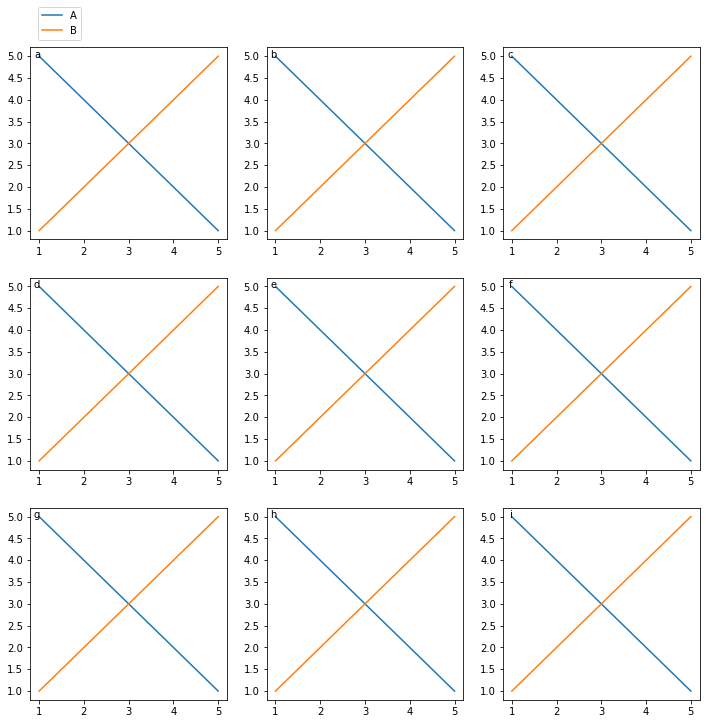

In [43]:
x = [1,2,3,4,5]
y = [5,4,3,2,1]
refs = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12,12))
for k, ax in enumerate(axes.flatten()):
    ax.plot(x,y, label='A')
    ax.plot(x,x, label='B')
    ax.text(0.05,0.99, refs[k], ha='right', va='top', transform=ax.transAxes)
axes[0,0].legend(bbox_to_anchor=(0.15,1.125), loc='center')
